In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt

# Read in Data

In [2]:
nClasses = 6
train_dset = tf.data.experimental.load('../data/dsets_combined_classes/train_dset-128',(tf.TensorSpec(shape=(None, 300, 171), dtype=tf.float64, name=None),
 tf.TensorSpec(shape=(None, nClasses), dtype=tf.float32, name=None)))
val_dset = tf.data.experimental.load('../data/dsets_combined_classes/val_dset-128',(tf.TensorSpec(shape=(None, 300, 171), dtype=tf.float64, name=None),
 tf.TensorSpec(shape=(None, nClasses), dtype=tf.float32, name=None)))
test_dset = tf.data.experimental.load('../data/dsets_combined_classes/test_dset-128',(tf.TensorSpec(shape=(None, 300, 171), dtype=tf.float64, name=None),
 tf.TensorSpec(shape=(None, nClasses), dtype=tf.float32, name=None)))

In [3]:
y_test = np.concatenate([y for x, y in test_dset], axis=0) # for model evaluation
y_test = [np.where(r==1)[0][0] for r in y_test] # convert from one-hot to integer

# Model

In [4]:
from numpy.random import seed
from tensorflow.random import set_seed
seed(0)
set_seed(0)

num_hidden_units = 256
num_outputs = 6

sequential_model = tf.keras.Sequential([
    tf.keras.Input(shape=(300, 171)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(num_hidden_units,return_sequences=True,kernel_regularizer='l2')),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(num_hidden_units,kernel_regularizer='l2')),
    tf.keras.layers.Dense(num_outputs,activation='softmax')
])

input_layer = tf.keras.Input(shape=(300, 171)) 
model = tf.keras.Model(inputs=input_layer, outputs=sequential_model(input_layer))

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 300, 171)]        0         
_________________________________________________________________
sequential (Sequential)      (None, 6)                 2454534   
Total params: 2,454,534
Trainable params: 2,454,534
Non-trainable params: 0
_________________________________________________________________


In [5]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=50,restore_best_weights=True)
EPOCHS = 300

history = model.fit(train_dset,epochs=EPOCHS,validation_data = val_dset,callbacks=[es])

Epoch 1/300
11/11 [==============================] - 7s 655ms/step - loss: 20.9543 - accuracy: 0.1724 - val_loss: 20.4589 - val_accuracy: 0.1824
Epoch 2/300
11/11 [==============================] - 6s 518ms/step - loss: 20.0829 - accuracy: 0.1864 - val_loss: 19.6261 - val_accuracy: 0.1647
Epoch 3/300
11/11 [==============================] - 6s 537ms/step - loss: 19.2437 - accuracy: 0.2194 - val_loss: 18.8051 - val_accuracy: 0.2412
Epoch 4/300
11/11 [==============================] - 6s 518ms/step - loss: 18.4363 - accuracy: 0.2326 - val_loss: 18.0190 - val_accuracy: 0.2588
Epoch 5/300
11/11 [==============================] - 6s 517ms/step - loss: 17.6598 - accuracy: 0.2685 - val_loss: 17.2548 - val_accuracy: 0.3000
Epoch 6/300
11/11 [==============================] - 6s 516ms/step - loss: 16.9075 - accuracy: 0.2715 - val_loss: 16.5045 - val_accuracy: 0.3176
Epoch 7/300
11/11 [==============================] - 6s 516ms/step - loss: 16.1590 - accuracy: 0.3206 - val_loss: 15.7530 - val_ac

Epoch 56/300
11/11 [==============================] - 6s 537ms/step - loss: 4.8001 - accuracy: 0.6654 - val_loss: 4.7694 - val_accuracy: 0.6647
Epoch 57/300
11/11 [==============================] - 6s 527ms/step - loss: 4.6868 - accuracy: 0.6970 - val_loss: 4.6457 - val_accuracy: 0.6941
Epoch 58/300
11/11 [==============================] - 6s 536ms/step - loss: 4.5574 - accuracy: 0.7087 - val_loss: 4.5967 - val_accuracy: 0.6824
Epoch 59/300
11/11 [==============================] - 6s 518ms/step - loss: 4.5027 - accuracy: 0.7219 - val_loss: 4.5718 - val_accuracy: 0.6824
Epoch 60/300
11/11 [==============================] - 6s 517ms/step - loss: 4.4332 - accuracy: 0.7241 - val_loss: 4.4292 - val_accuracy: 0.7471
Epoch 61/300
11/11 [==============================] - 6s 525ms/step - loss: 4.3634 - accuracy: 0.7410 - val_loss: 4.3825 - val_accuracy: 0.6824
Epoch 62/300
11/11 [==============================] - 6s 527ms/step - loss: 4.3718 - accuracy: 0.7021 - val_loss: 4.3489 - val_accuracy:

Epoch 113/300
11/11 [==============================] - 6s 527ms/step - loss: 2.7763 - accuracy: 0.8408 - val_loss: 3.1355 - val_accuracy: 0.7235
Epoch 114/300
11/11 [==============================] - 6s 537ms/step - loss: 2.8072 - accuracy: 0.8357 - val_loss: 3.1383 - val_accuracy: 0.7176
Epoch 115/300
11/11 [==============================] - 6s 516ms/step - loss: 2.7951 - accuracy: 0.8313 - val_loss: 3.1615 - val_accuracy: 0.6882
Epoch 116/300
11/11 [==============================] - 6s 524ms/step - loss: 2.7055 - accuracy: 0.8606 - val_loss: 3.1235 - val_accuracy: 0.7235
Epoch 117/300
11/11 [==============================] - 6s 526ms/step - loss: 2.6644 - accuracy: 0.8811 - val_loss: 3.0706 - val_accuracy: 0.7176


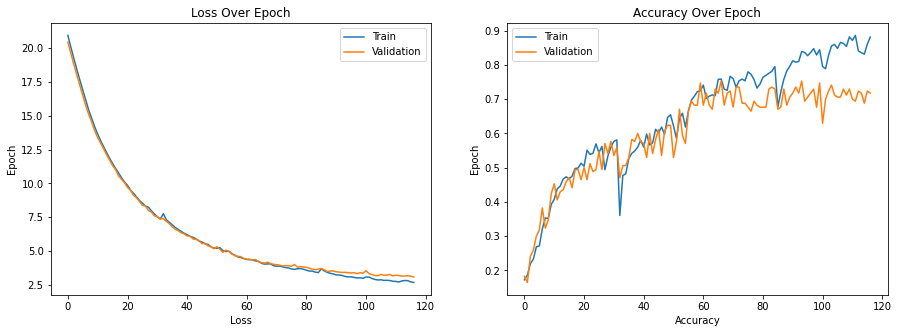

In [6]:
x = np.arange(len(history.history['accuracy']))

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label="Train")
plt.plot(history.history['val_loss'], label="Validation")
plt.title("Loss Over Epoch")
plt.xlabel("Loss")
plt.ylabel("Epoch")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label="Train")
plt.plot(history.history['val_accuracy'], label="Validation")
plt.title("Accuracy Over Epoch")
plt.xlabel("Accuracy")
plt.ylabel("Epoch")
plt.legend()
plt.show()

plt.close()

In [7]:
# test set
(loss,accuracy) = model.evaluate(test_dset)
print('Test accuracy: %.3f' %accuracy)

2/2 [==============================] - 0s 70ms/step - loss: 4.1848 - accuracy: 0.7076
Test accuracy: 0.708


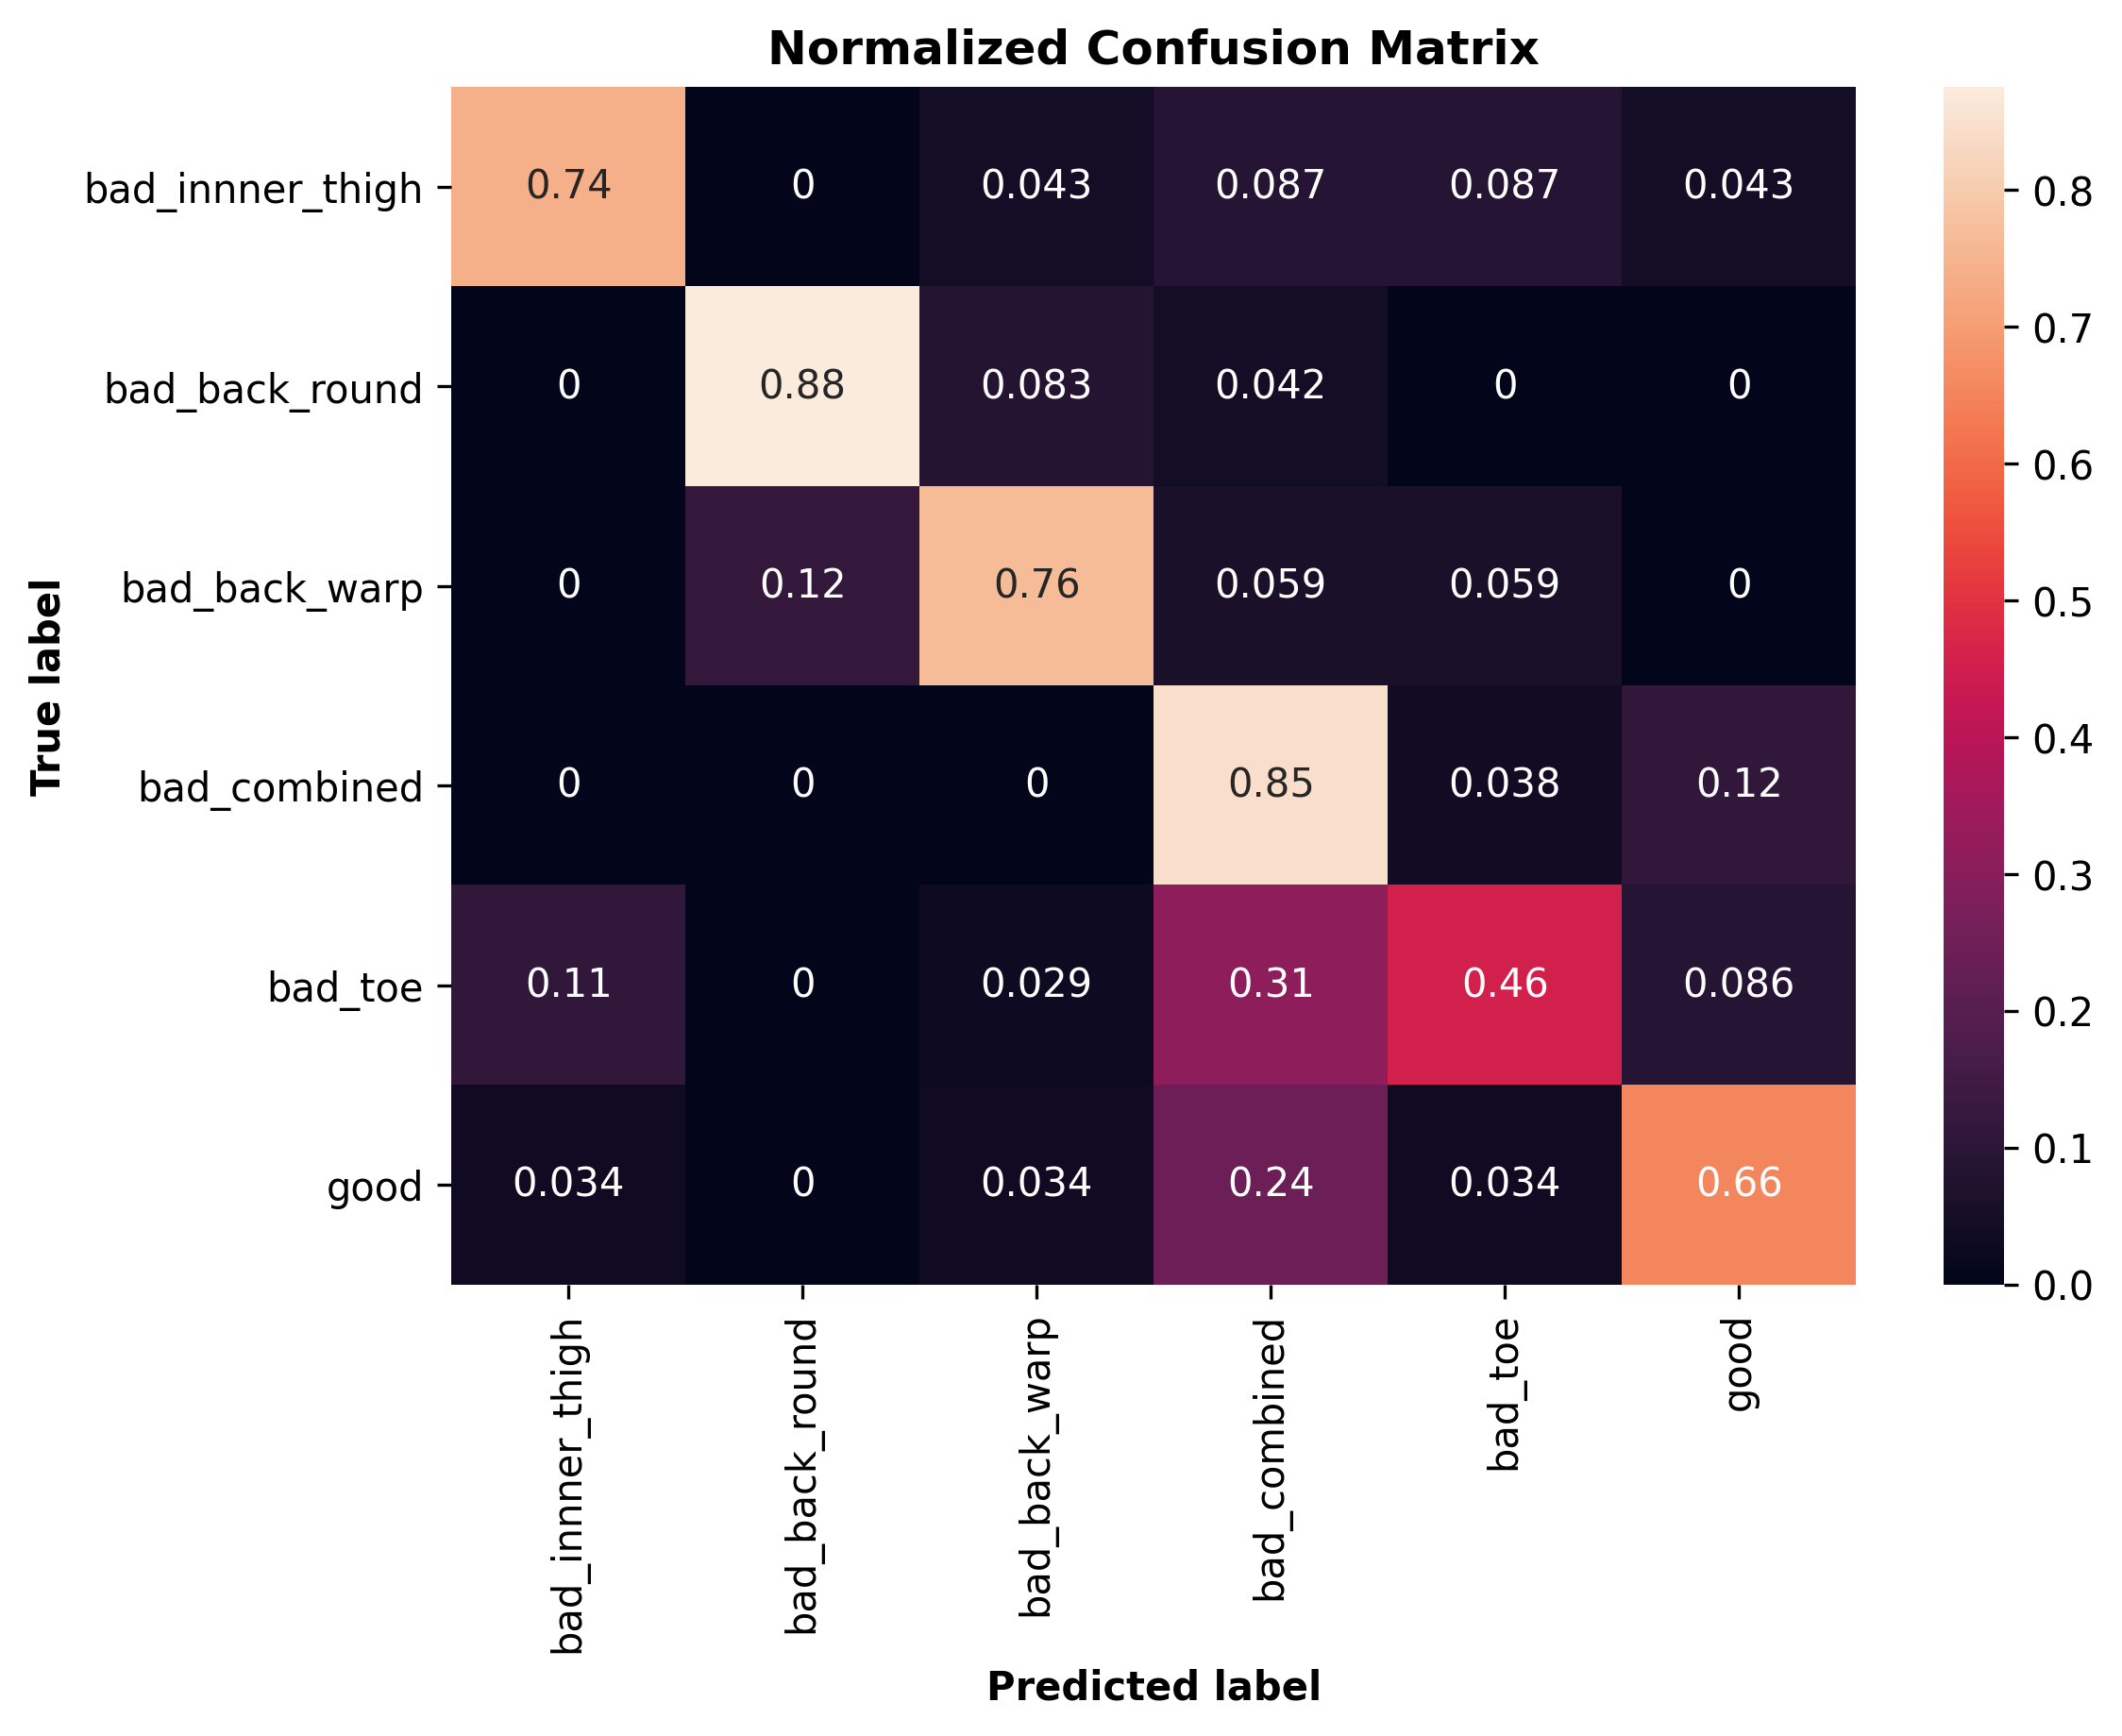


Accuracy: 0.71

Micro Precision: 0.71
Micro Recall: 0.71
Micro F1-score: 0.71

Macro Precision: 0.73
Macro Recall: 0.72
Macro F1-score: 0.71

Weighted Precision: 0.74
Weighted Recall: 0.71
Weighted F1-score: 0.71

Classification Report

                  precision    recall  f1-score   support

bad_innner_thigh       0.77      0.74      0.76        23
  bad_back_round       0.84      0.88      0.86        24
   bad_back_warp       0.84      0.76      0.80        34
    bad_combined       0.49      0.85      0.62        26
         bad_toe       0.73      0.46      0.56        35
            good       0.73      0.66      0.69        29

        accuracy                           0.71       171
       macro avg       0.73      0.72      0.71       171
    weighted avg       0.74      0.71      0.71       171

Cohen Kappa Statistic



0.6494033706482962

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import cohen_kappa_score
#Note: good source on the methods below: 
#https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826
#prelim results

#find model predictions
predictions = model.predict(test_dset)
y_pred = np.argmax(predictions, axis=1) #convert those predictions to labels

#confusion matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test,y_pred, normalize = 'true') #true,pred
display_labels = ['bad_innner_thigh', 'bad_back_round', 'bad_back_warp', 'bad_combined', 'bad_toe', 'good']

df_cm = pd.DataFrame(cm, index = display_labels, columns = display_labels)
plt.figure(figsize=(8, (7 * 8)/10),dpi=300)
#sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True) # font size #,annot_kws={"size": 16}
plt.ylabel('True label', fontweight = 'bold')
plt.xlabel('Predicted label', fontweight = 'bold')
plt.title('Normalized Confusion Matrix', fontweight = 'bold')
plt.show()

#importing accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))


print('\nClassification Report\n')
classification_rep = classification_report(y_test, y_pred, target_names= display_labels)
print(classification_rep)


#Cohen Kappa Statistic
print('Cohen Kappa Statistic\n')
cohen_kappa_score(y_test, y_pred, labels=None, weights=None, sample_weight=None)